In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearAc1name = pd.read_csv('queries_results/POL monthyear ac1name count.csv', header = 0)
POLmonthyearAc1name["Time"]=pd.to_datetime(POLmonthyearAc1name['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

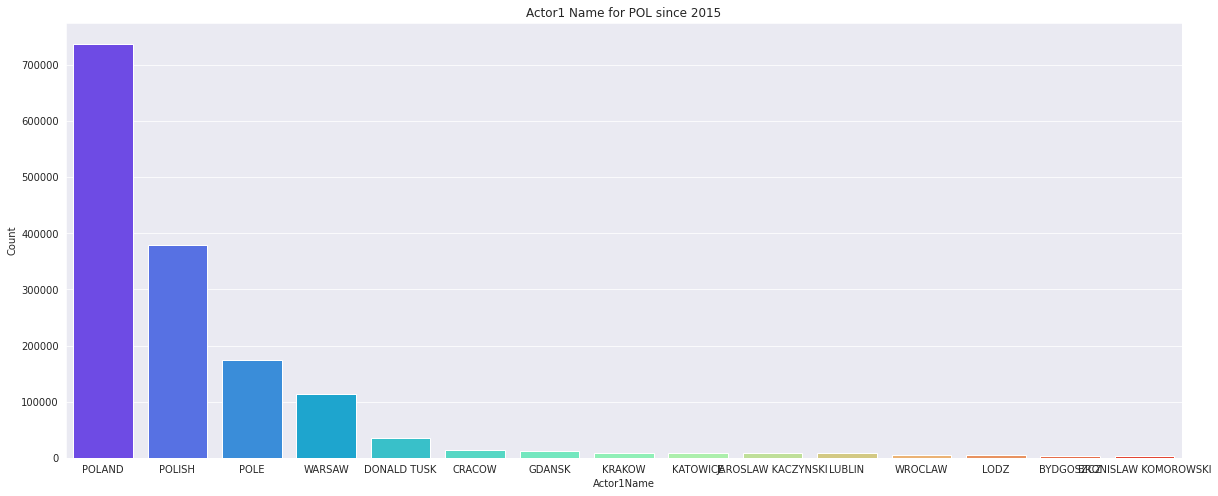

In [2]:
s = POLmonthyearAc1name.groupby("Actor1Name").sum().sort_values(by="Count", ascending=False).head(15)
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor1 Name for POL since 2015")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

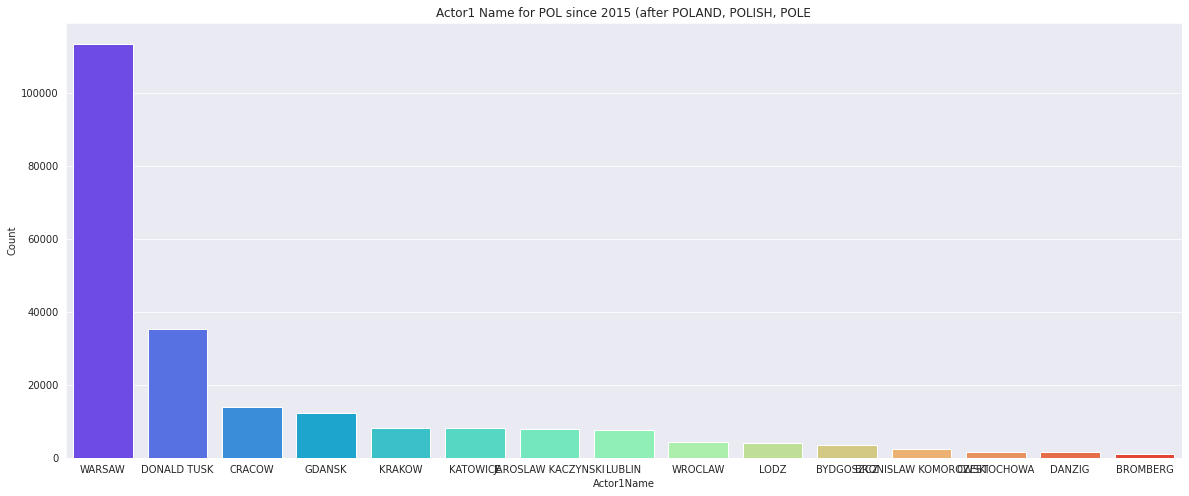

In [3]:
s = POLmonthyearAc1name.groupby("Actor1Name").sum().sort_values(by="Count", ascending=False).head(18)[3:]
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor1 Name for POL since 2015 (after POLAND, POLISH, POLE")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)


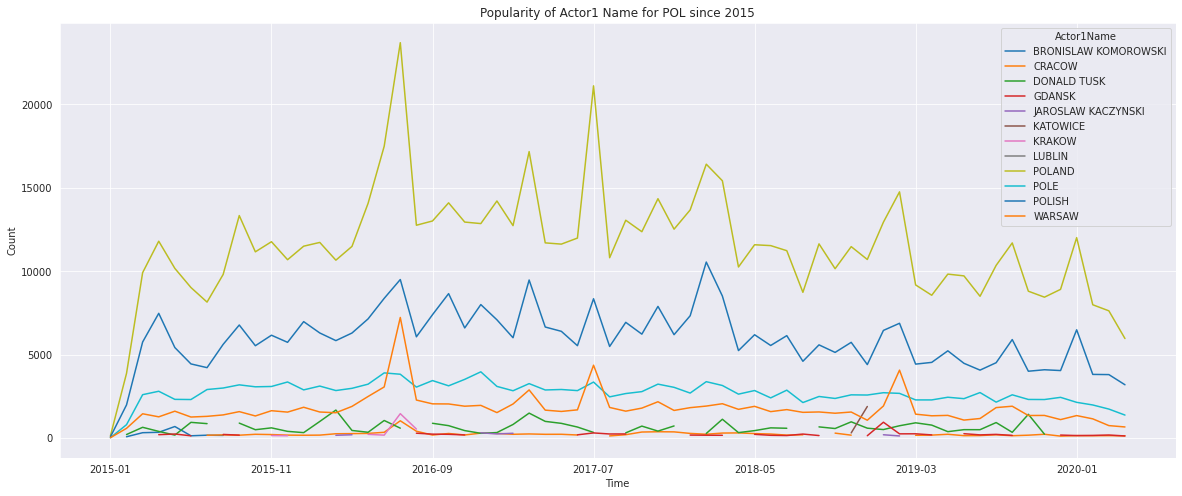

In [51]:
s = POLmonthyearAc1name.groupby(["Actor1Name", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(7)
s = s.groupby(["Time","Actor1Name"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor1 Name for POL since 2015")
g.figure.set_size_inches(20,8)

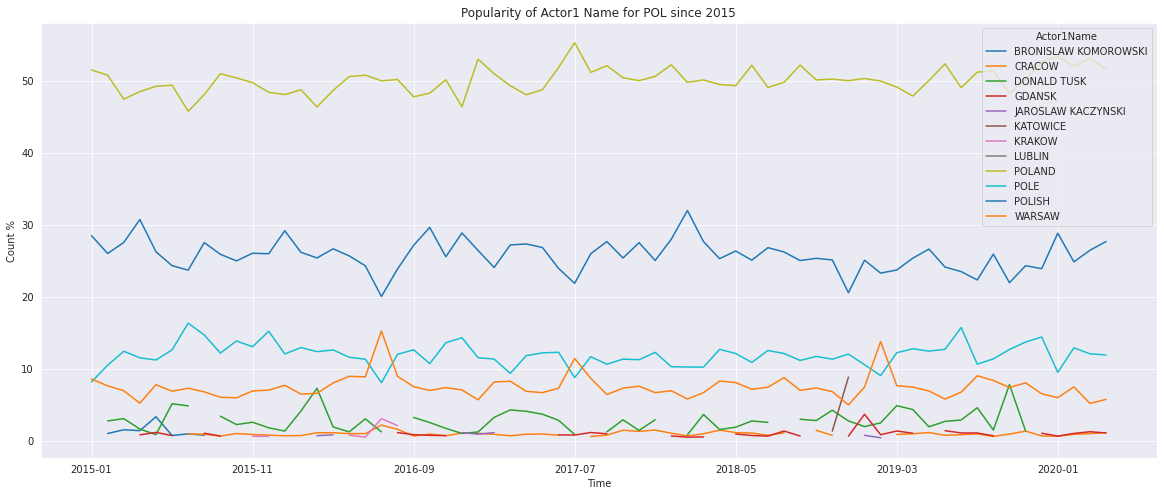

In [52]:
s = POLmonthyearAc1name.groupby(["Actor1Name", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(7)
s = s.groupby(["Time","Actor1Name"]).agg({'Count':'sum'})
s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())
g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor1 Name for POL since 2015")
g.figure.set_size_inches(20,8)

